In [46]:
import sys
import os
import time
import warnings
import string

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
from cycler import cycler

from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow
from structure_factor.hyperuniformity import bin_data, hyperuniformity_class
from structure_factor.data import load_data
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
import structure_factor.pair_correlation_function as pcf
from structure_factor.tapers import multi_sinetaper_grid
from structure_factor.utils import meshgrid_to_column_matrix
from structure_factor.tapered_estimators import allowed_k_scattering_intensity, scattering_intensity, tapered_estimator_debiased_direct

import massPy as mp
from utils import get_defect_list, get_defect_arr_from_frame, get_frame_number
from AnalyseDefects import AnalyseDefects

plt.style.use('sg_article')


In [25]:
gin_process = GinibrePointProcess()
window = BallWindow(center=[0, 0], radius=20)
points = point_process.generate_sample(window=window)

In [29]:
points.shape

(392, 2)

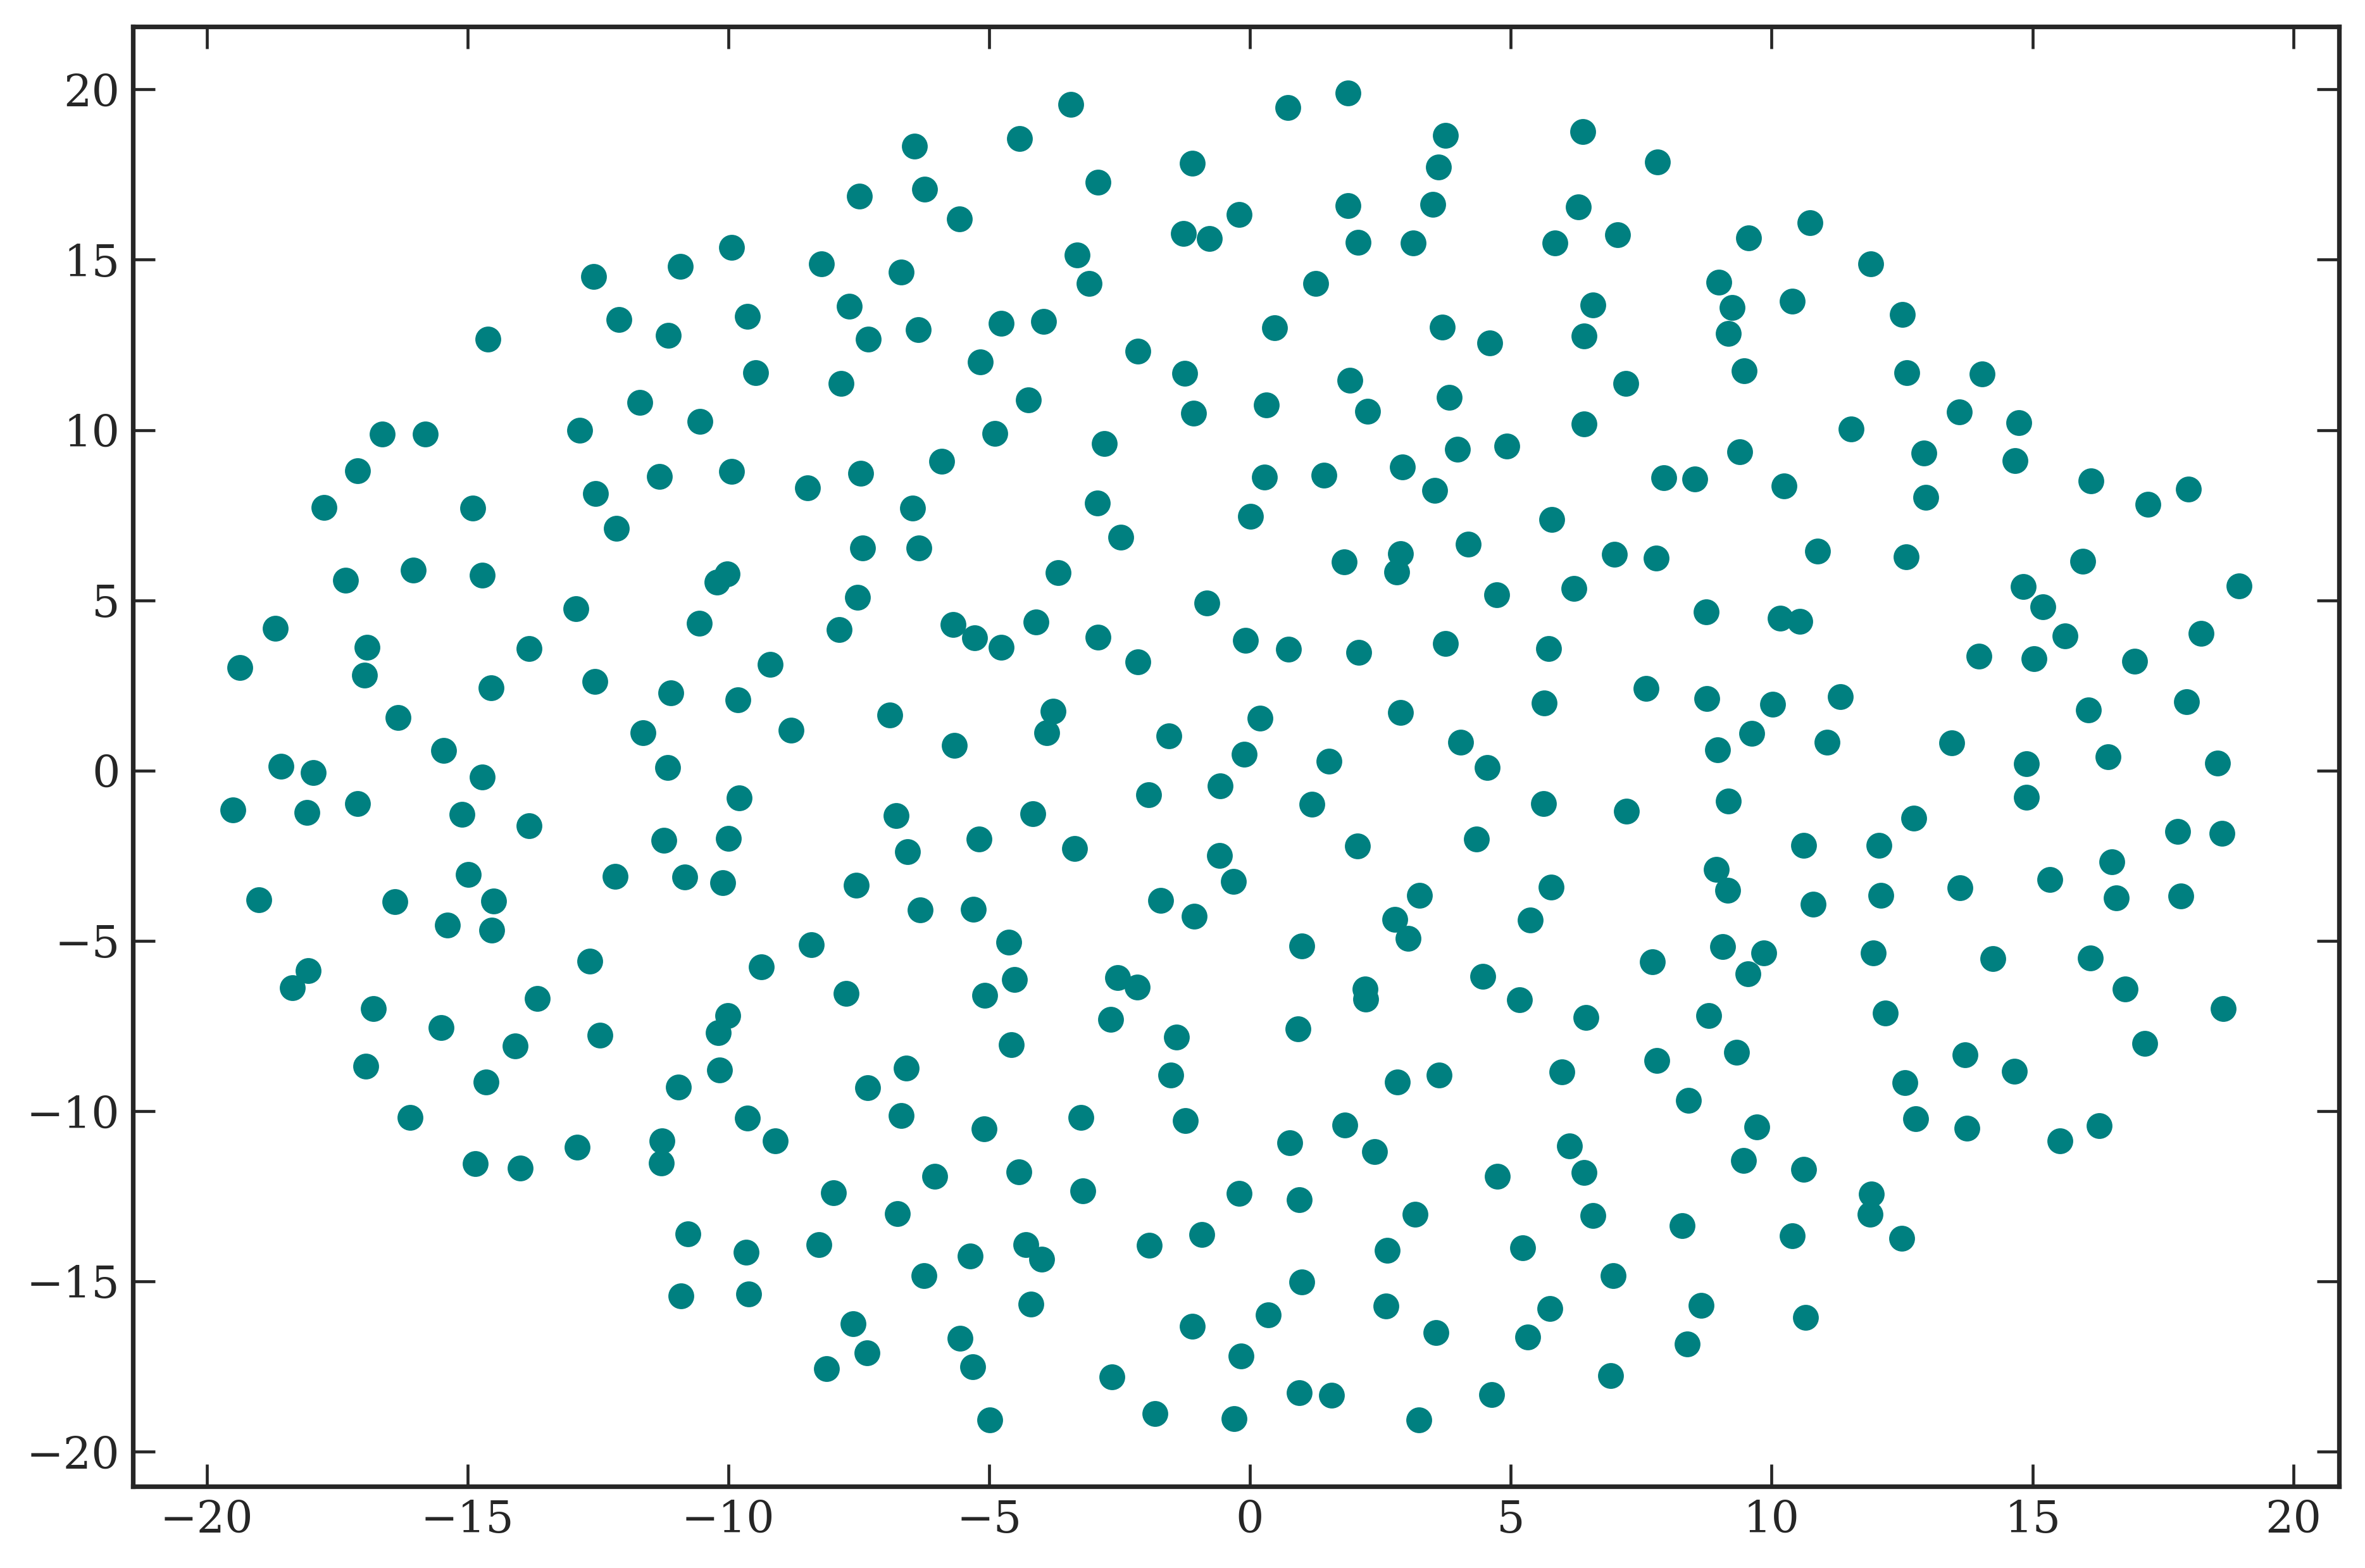

In [30]:
plt.scatter(points[:,0], points[:,1])

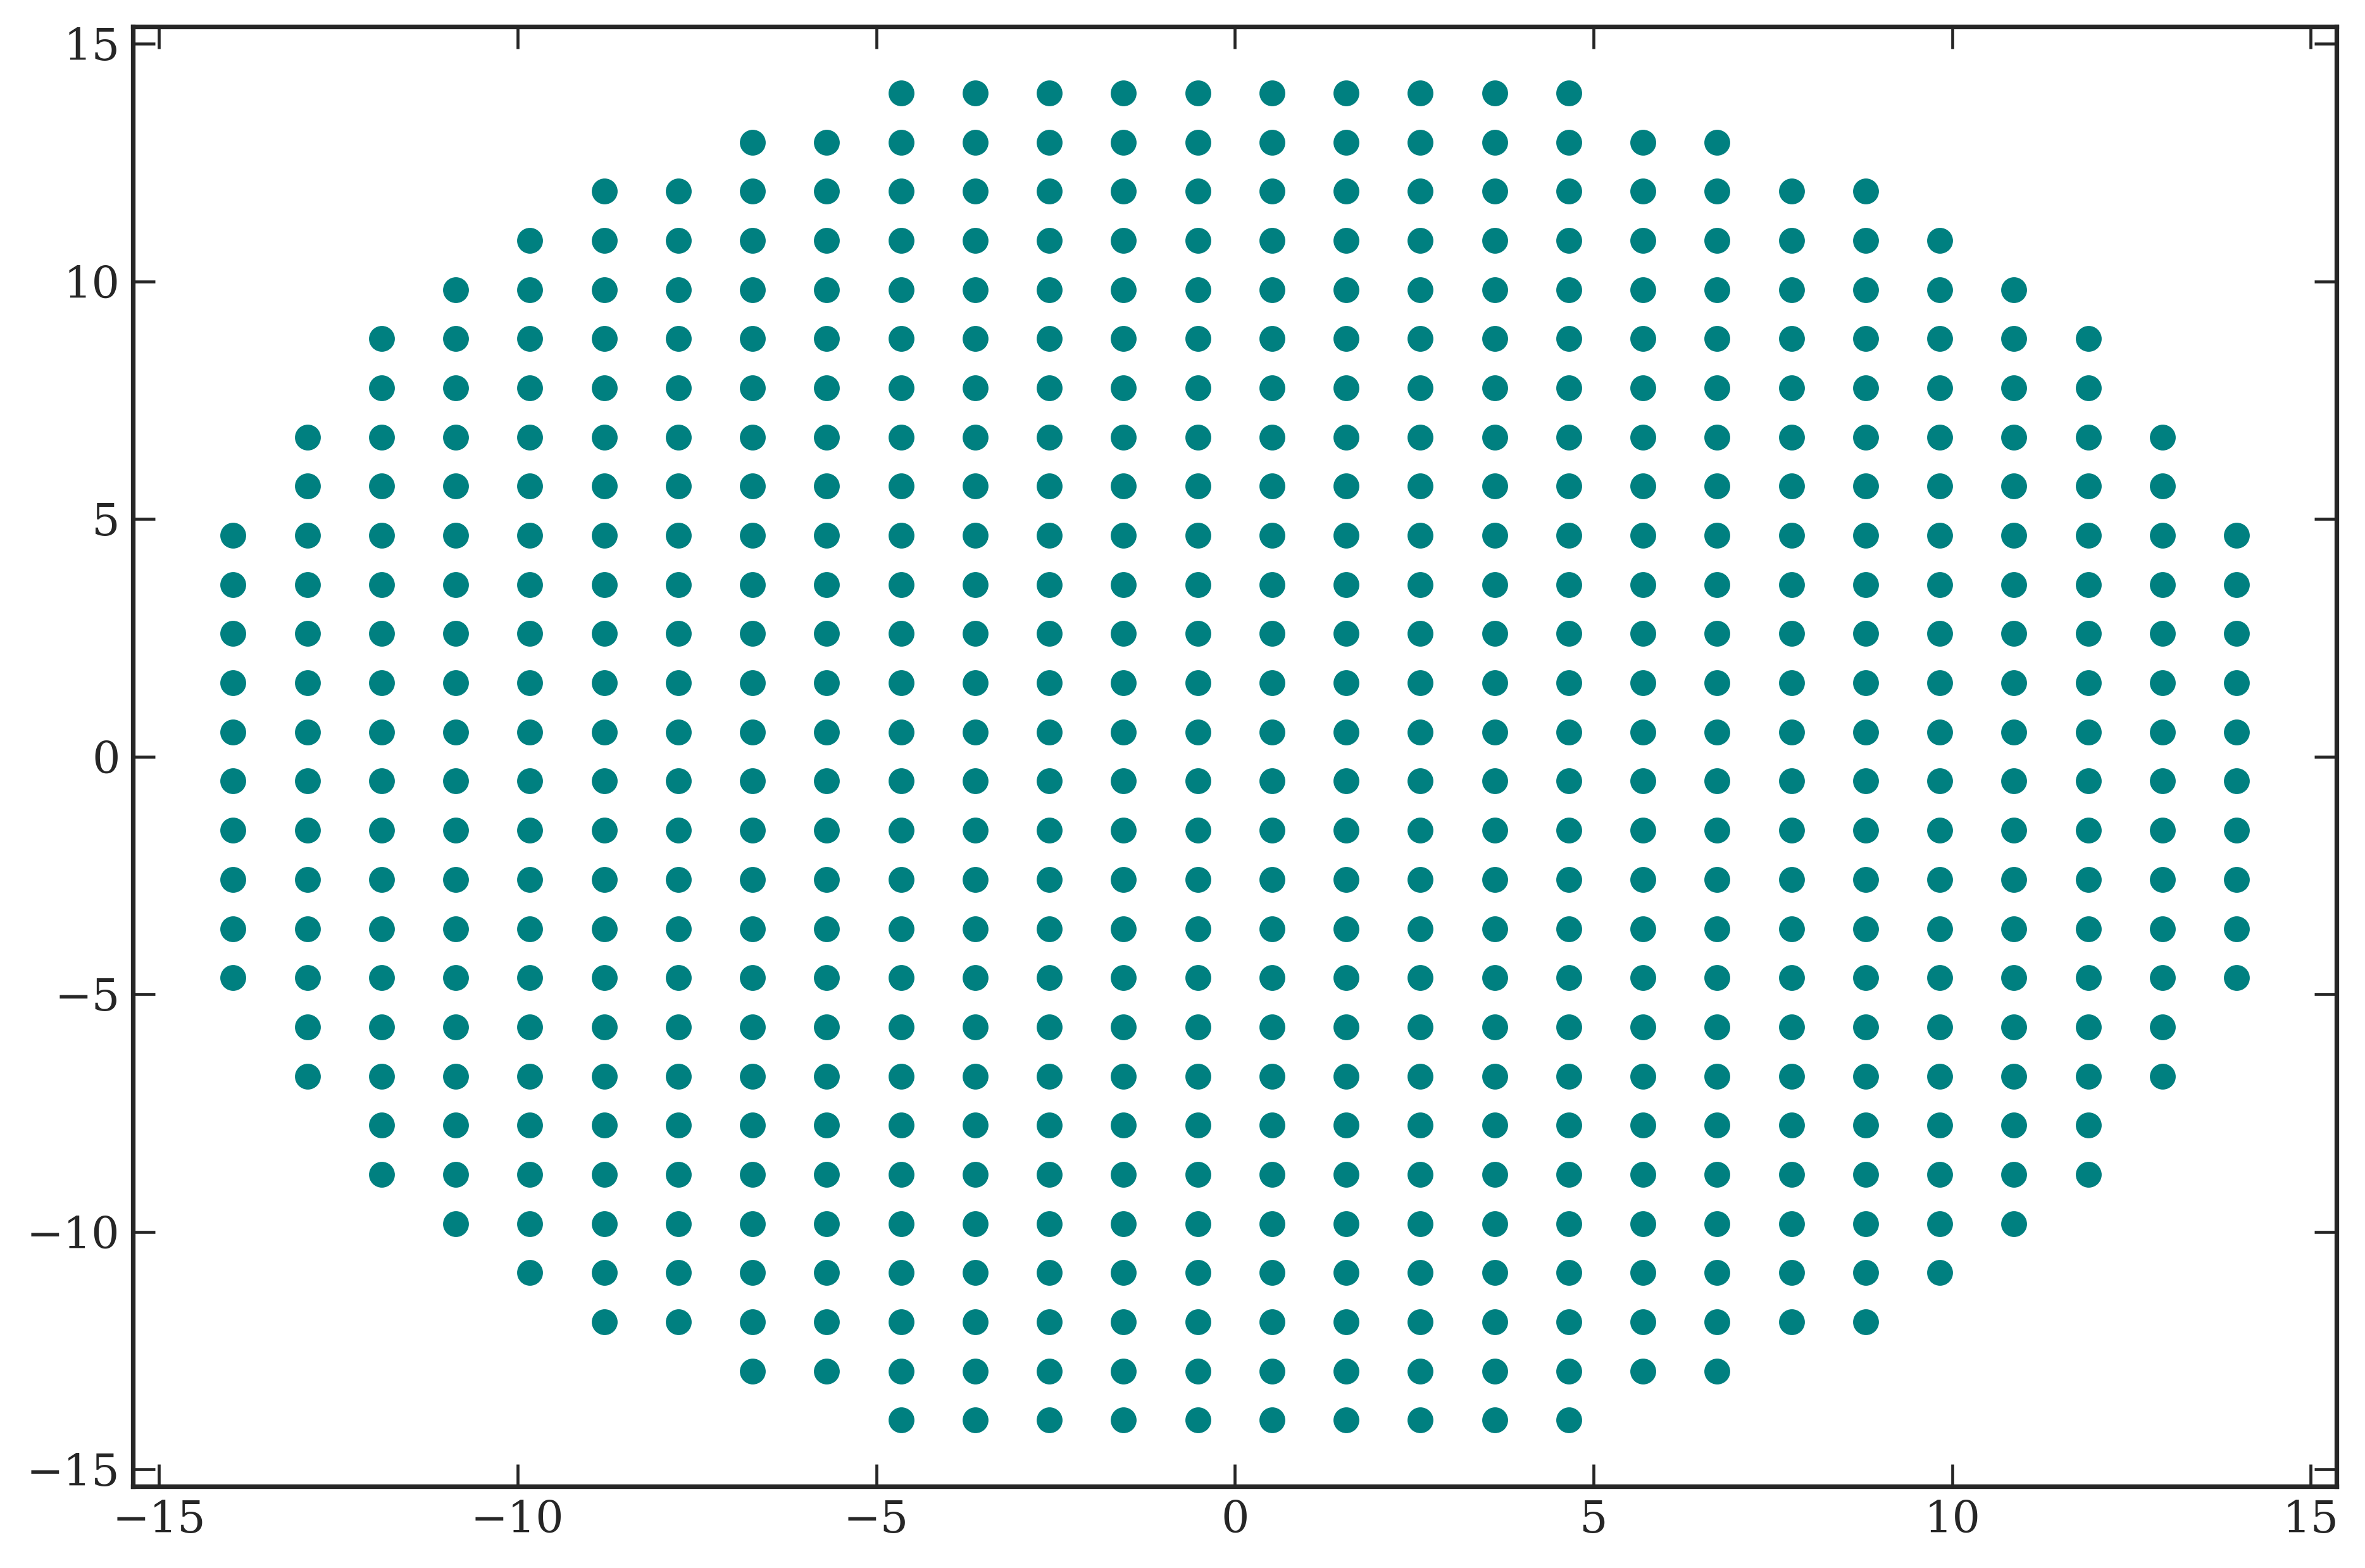

In [56]:
nc = 30
Xc = np.linspace(-radius,radius, nc)
XX, YY = np.meshgrid(Xc, Xc)    
X = np.array([XX.flatten(), YY.flatten()]).T
mask = np.linalg.norm(X, axis=1) <= radius
plt.scatter(X[mask,0], X[mask,1])

In [72]:
from matplotlib.pyplot import xlim
from structure_factor.point_processes import HomogeneousPoissonPointProcess, ThomasPointProcess, GinibrePointProcess
from structure_factor.spatial_windows import BoxWindow, BallWindow


fig, axx = plt.subplots(ncols=4, figsize=(4,15))
axx = axx.flatten() 
intensity = .3
clustering = 0.1
radius=15
#point_process_list = [HomogeneousPoissonPointProcess(intensity=intensity), \
#ThomasPointProcess(intensity=intensity, clustering=0.1), GinibrePointProcess(intensity=intensity)]

window = BallWindow(center=[0, 0], radius=radius)
point_process_list = [GinibrePointProcess, HomogeneousPoissonPointProcess, ThomasPointProcess]
kwargs_list = [dict(), dict(intensity=intensity), dict(kappa=1 / (20 * np.pi), mu=20, sigma=2)]
for i, ax in enumerate(axx):
  
    if i == 0:
        Xc = np.linspace(-radius,radius, nc)
        XX, YY = np.meshgrid(Xc, Xc)    
        X = np.array([XX.flatten(), YY.flatten()]).T
        mask = np.linalg.norm(X, axis=1) <= radius
     #   ax.scatter(X[mask,0], X[mask,1])
        point_pattern = PointPattern(X[mask], window) 
    else:
        point_process = point_process_list[i-1](**kwargs_list[i-1])
        point_pattern = point_process.generate_point_pattern(window=window)
    point_pattern.plot(ax)
    #ax.scatter(point_pattern[:,0], point_pattern[:,1])
    ax.set_aspect("equal", "box")
    ax.grid('False')
    #ax.set_title(point_process.__class__.__name__)
    # Turn off the axis including ticks
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set(xlim = (-radius, radius), ylim = (-radius, radius))

#for n, ax in enumerate(axx):
 #   ax.text(-0.15, -.18, string.ascii_uppercase[n], transform=ax.transAxes,
  #          size=12, weight='bold')

#plt.tight_layout(pad=1)
fig.tight_layout()